In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading data set

df=pd.read_csv('insurance.csv')

In [3]:
#looking at first few observations

df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In total there are 7 columns and 1338 rows and data types are correctly handled 

##### Looking for missing values

In [5]:
#lets look for missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values . Lets see is there any illegal entries in variable of type object

### Looking for illegal entries in object type variables

In [6]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [7]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [8]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Ok There are no illegal entries in object type variaables

### EDA and statistical testing

### Target variable

In [9]:
df.charges.mean()

13270.422265141257

Text(0, 0.5, 'Frequency')

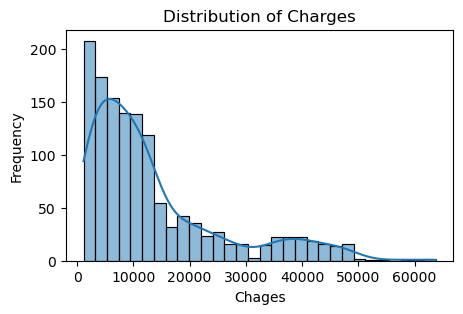

In [10]:
plt.figure(figsize=(5,3))
sns.histplot(df['charges'],kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Chages')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Boxplot of charges')

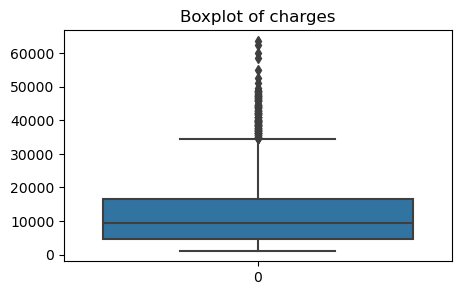

In [11]:
plt.figure(figsize=(5,3))
sns.boxplot(df['charges'])
plt.title('Boxplot of charges')

In [12]:
print('mean',np.mean(df.charges))
print('median',np.median(df.charges))
print('standard_deviation',np.std(df.charges))

mean 13270.422265141257
median 9382.033
standard_deviation 12105.484975561605


Data is right skewed looks like there are some outliers median charge is 9382 standard deviation is quite high.

Most of the target data scattered around 5000 to 15000.

Data has large standard deviation indicating  high scatter in data


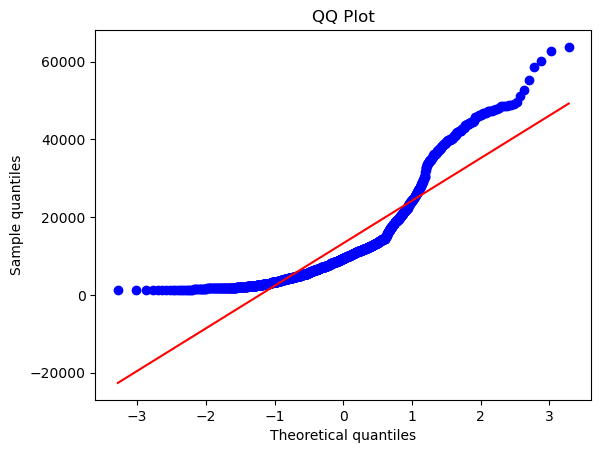

In [13]:

stats.probplot(df['charges'], dist="norm", plot=plt)
plt.title('QQ Plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.show()

Distribution is not normal

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### analysing age and   charges vs age

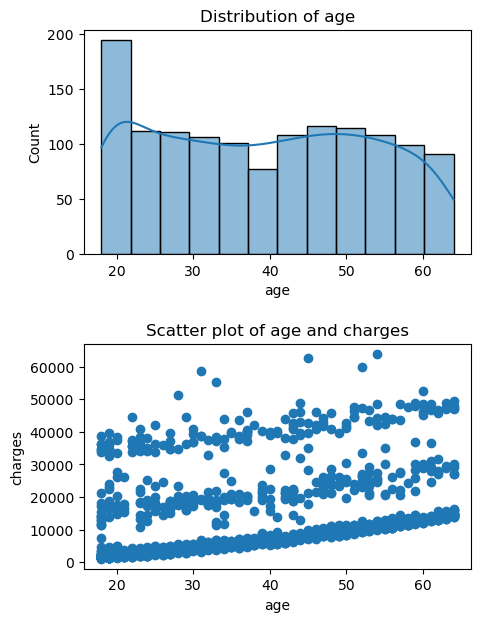

In [15]:
fig,axes=plt.subplots(2,1,figsize=(5,7))
plt.subplots_adjust(wspace=4,hspace=0.4)
hist_plot=sns.histplot(df.age,kde=True,ax=axes[0])
hist_plot.set_title('Distribution of age')
axes[1].scatter(x=df.age,y=df.charges)
axes[1].set_title('Scatter plot of age and charges')
axes[1].set_xlabel('age')
axes[1].set_ylabel('charges')
plt.show()


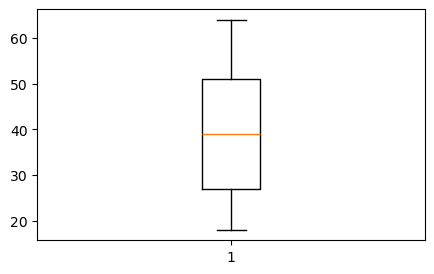

In [16]:
plt.figure(figsize=(5,3))
plt.boxplot(df.age)
plt.show()

Looks like there is decent realtion between age and charges but it doesnt looks like age contributes a lot(when alone) for predicting charges

Looks like no outlier in age column

lets check the relation between age and charges by fitting simple linear regression

In [17]:
#note we will look at r2 score since it tells us how  much variaiton in charges is captured by relation between charge and age

slr=LinearRegression()
slr.fit(df[['age']],df[['charges']])
predicted=slr.predict(df[['age']])
print("r2_score (amount variation in charges captured by reltion between charges and age) : ",r2_score(df[['charges']],predicted))

r2_score (amount variation in charges captured by reltion between charges and age) :  0.08940589967885804


Ok r2 score is low so it doesnt look like it contributes a lot. But it may contribute well in presence of other variables.

#### Analysing effect of sex smoker and region on age

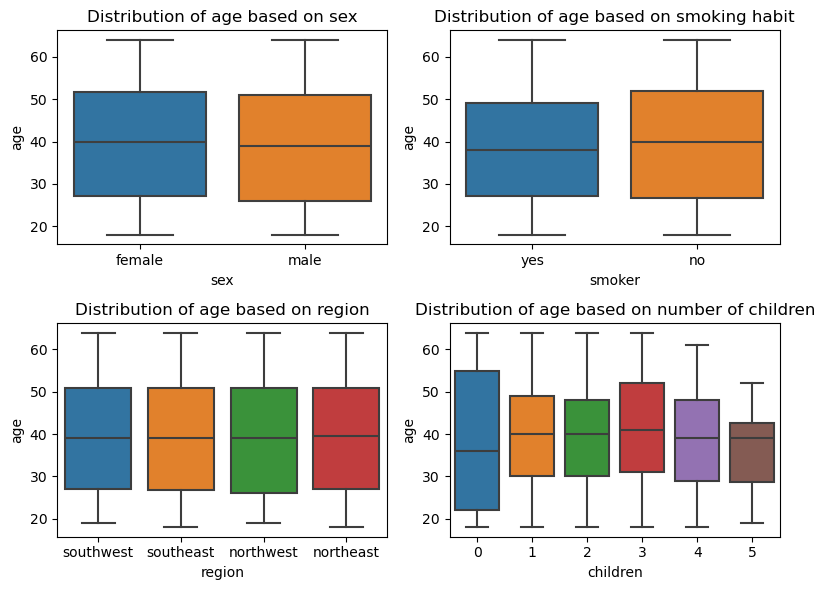

In [18]:

# Create subplots for each category
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Plot 1: Distribution of age based on sex
sns.boxplot(y='age', x='sex', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of age based on sex')

# Plot 2: Distribution of age based on smoker
sns.boxplot(y='age', x='smoker', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of age based on smoking habit')

# Plot 3: Distribution of age based on region
sns.boxplot(y='age', x='region', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of age based on region')

# Plot 4: Distribution of age based on children
sns.boxplot(y='age', x='children', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of age based on number of children')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Looks like there is no (individual) effect of sex,gender,region on distribution of age. BUt distribution of age s not equall among children class

Lets see whether there is any interaction effect of categories on age so we can know whether there will be any multicollinearity problems in future or not

Checking distribution of age based on different ategories to apply t test

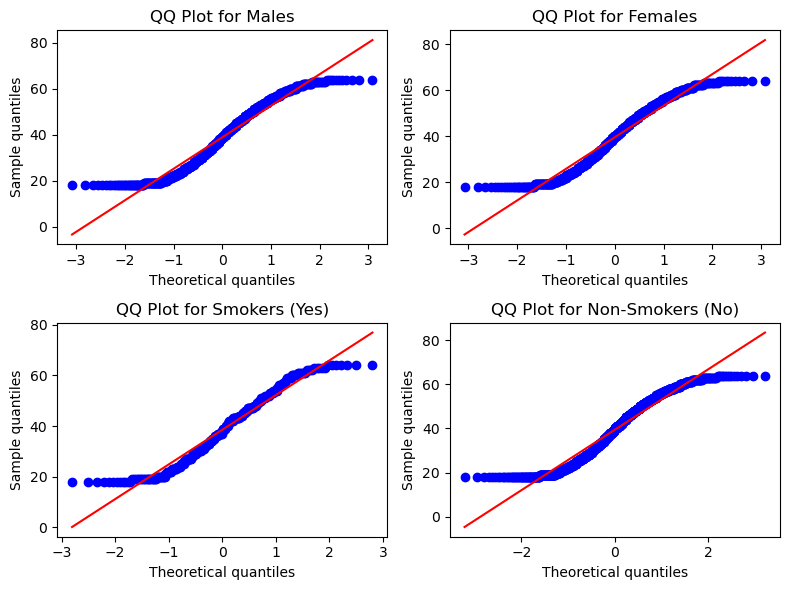

In [19]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot Q-Q plots for each category
stats.probplot(df[df['sex']=='male']['age'], dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('QQ Plot for Males')
axs[0, 0].set_xlabel('Theoretical quantiles')
axs[0, 0].set_ylabel('Sample quantiles')

stats.probplot(df[df['sex']=='female']['age'], dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('QQ Plot for Females')
axs[0, 1].set_xlabel('Theoretical quantiles')
axs[0, 1].set_ylabel('Sample quantiles')

stats.probplot(df[df['smoker']=='yes']['age'], dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('QQ Plot for Smokers (Yes)')
axs[1, 0].set_xlabel('Theoretical quantiles')
axs[1, 0].set_ylabel('Sample quantiles')

stats.probplot(df[df['smoker']=='no']['age'], dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('QQ Plot for Non-Smokers (No)')
axs[1, 1].set_xlabel('Theoretical quantiles')
axs[1, 1].set_ylabel('Sample quantiles')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


Distribution is not normal so we canot applly t test lets go for nnon  parametric test manwhitneyu which compares median of two independent group.

In [20]:
#man whitney test for age and sex

male_age=df[df['sex']=='male']['age']
female_age=df[df['sex']=='female']['age']

statistic, p_value = mannwhitneyu(male_age, female_age)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {round(p_value,2)}")

Mann-Whitney U statistic: 218381.0
P-value: 0.45


P value is greater than 0.05 so accept null hypothesis and conclude that. There is no significant effect of sex on age

In [21]:
#man whitney test for age and smoker

male_age=df[df['smoker']=='yes']['age']
female_age=df[df['smoker']=='yes']['age']

statistic, p_value = mannwhitneyu(male_age, female_age)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 37538.0
P-value: 1.0


P value is greater than 0.05 so accept null hypothesis and conclude that. There is no significant effect of smoker on age

Null Hypothesis: The medians of all groups are equal.

In [22]:
# Create lists of age for each region
east_age = df[df['region'] == 'northeast']['age']
west_age = df[df['region'] == 'southwest']['age']
north_age = df[df['region'] == 'northwest']['age']
south_age = df[df['region'] == 'southeast']['age']

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(east_age, west_age, north_age, south_age)

print(f"Kruskal-Wallis statistic: {statistic}")
print(f"P-value: {p_value}")

Kruskal-Wallis statistic: 0.41381572319767296
P-value: 0.9373739330192226


p value >0.05 so we conclude that there is no significant effect of region on age

effect of children on age

In [23]:
# Separate ages based on children categories
age_children_0 = df[df['children'] == 0]['age']
age_children_1 = df[df['children'] == 1]['age']
age_children_2 = df[df['children'] == 2]['age']
age_children_3 = df[df['children'] == 3]['age']
age_children_4 = df[df['children'] == 4]['age']
age_children_5 = df[df['children'] == 5]['age']

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(age_children_0, age_children_1, age_children_2, age_children_3, age_children_4, age_children_5)

# Print the results
print(f"Kruskal-Wallis Test:")
print(f" Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The differences in age between groups based on children are statistically significant.")
else:
    print("There is no significant difference in age between groups based on children.")

Kruskal-Wallis Test:
 Statistic: 8.43495351917709
P-value: 0.13383780577541018
There is no significant difference in age between groups based on children.


#### analysing relation between age and bmi

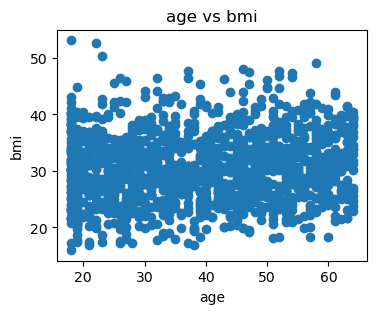

In [24]:
plt.figure(figsize=(4,3))
plt.scatter(x=df['age'],y=df['bmi'])
plt.title('age vs bmi')
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

looks like there is no relation between age and bmi

In [25]:
lr=LinearRegression()
lr.fit(df[['bmi']],df[['age']])
prdct=lr.predict(df[['bmi']])
r2_score(df[['age']],prdct)

0.011940344097157052

r2 score is too low so looks like there is no direct relation between age and bmi

Ok so far in our analysis there is less relation between age and charges 

In addition looks like there is no effect of other variables on age (so there wont be problem of multicollinearity problem on age column)

### Analysing bmi and bmi vs charges

Text(0.5, 1.0, 'Distribution of bmi')

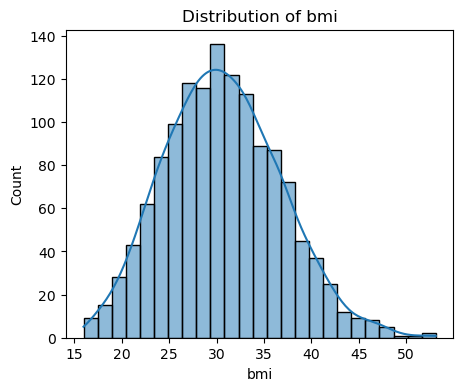

In [26]:
plt.figure(figsize=(5,4))
sns.histplot(df['bmi'],kde=True)
plt.title("Distribution of bmi")

distribution looks like almost normal

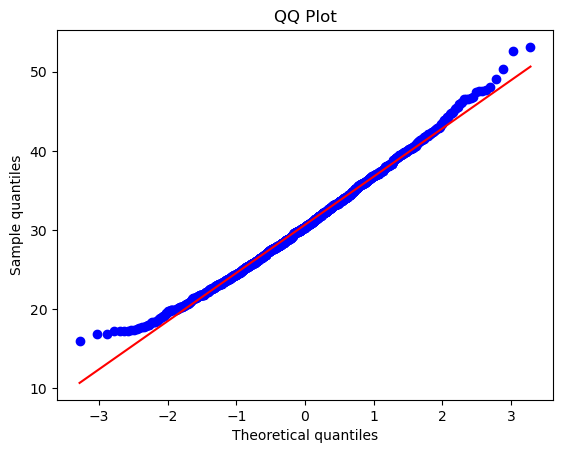

In [27]:
#QQ plot to  verify whther bmi distribution is normal or not

stats.probplot(df['bmi'], dist="norm", plot=plt)
plt.title('QQ Plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.show()

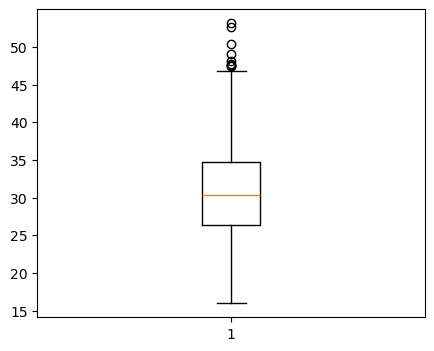

In [28]:
plt.figure(figsize=(5,4))
plt.boxplot(df['bmi'])
plt.show()

looks like there are few outliers in bmi data

### Analysing effect of sex smoker and region on bmi

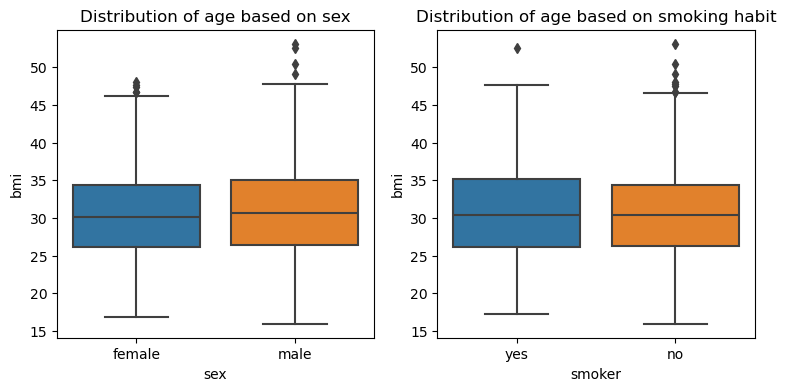

In [29]:
fig,axes=plt.subplots(1,2,figsize=(9,4))
axes1=sns.boxplot(y='bmi',x='sex',data=df,ax=axes[0])
axes2=sns.boxplot(y='bmi',x='smoker',data=df,ax=axes[1])
axes1.set_title('Distribution of age based on sex')
axes2.set_title("Distribution of age based on smoking habit")
plt.show()

<Figure size 640x480 with 0 Axes>

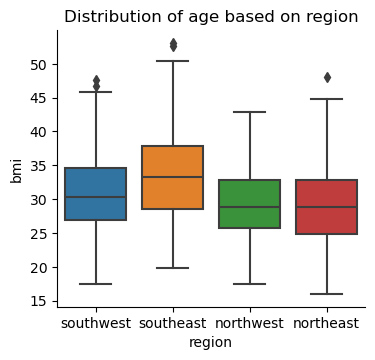

In [30]:
fig=plt.figure()
sns.catplot(y='bmi',x='region',data=df,kind='box',height=3.5,aspect=1.1)
plt.title('Distribution of age based on region')
plt.show()

By looking at boxplot it feels like there is not much significant difference in distribution of bmi based on sex and smoking habit however distribution looks slightly wider for smokers and in sex for male. 

people in southeast region seems to have slight higher bmi distribution

In [31]:
df[df['region']=='southeast']['sex'].value_counts()


sex
male      189
female    175
Name: count, dtype: int64

In [32]:
df[df['region']=='southeast']['smoker'].value_counts()

smoker
no     273
yes     91
Name: count, dtype: int64

gender in souteast is well balanced there is dif in smkoer ration still we have high amout of non smokers but we have high bmi distribution in southeast region

In [33]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

How to Check this Assumption
We use the following rule of thumb to determine if the variances between the two samples are equal: If the ratio of the larger variance to the smaller variance is less than 4, then we can assume the variances are approximately equal and use the two sample t-test.

In [34]:
male_var=df[df['sex']=='male']['bmi'].var()
female_var=  df[df['sex']=='female']['bmi'].var()
max(male_var,female_var)/min(male_var,female_var)

1.0314747956470616

We can assume variance is constant and distribution looks almost normal so lets apply t test

In [35]:
statistic, p_value = ttest_ind(df[df['sex']=='male']['bmi'], df[df['sex']=='female']['bmi'])

print(f"T-test statistic: {statistic}")
print(f"P-value: {p_value}")

T-test statistic: 1.696752635752224
P-value: 0.08997637178984932


In [36]:
yes_var=df[df['smoker']=='yes']['bmi'].var()
no_var=   df[df['smoker']=='no']['bmi'].var()
max(yes_var,no_var)/min(yes_var,no_var)

1.0932678413350385

In [37]:
statistic, p_value = ttest_ind(df[df['smoker']=='yes']['bmi'], df[df['smoker']=='no']['bmi'])

print(f"T-test statistic: {statistic}")
print(f"P-value: {p_value}")

T-test statistic: 0.13708403310827058
P-value: 0.8909850280013041


There is no significant effect of smoker and sex on bmi

Now look for effects of region

In [38]:
northeast_bmi = df[df['region'] == 'northeast']['bmi']
southwest_bmi = df[df['region'] == 'southwest']['bmi']
northwest_bmi = df[df['region'] == 'northwest']['bmi']
southeast_bmi = df[df['region'] == 'southeast']['bmi']


In [39]:
max(northeast_bmi.var(), northwest_bmi.var(), southeast_bmi.var(), southwest_bmi.var())/min(northeast_bmi.var(), northwest_bmi.var(), southeast_bmi.var(), southwest_bmi.var())

1.5902129666790072

we can assume variance is almost constant

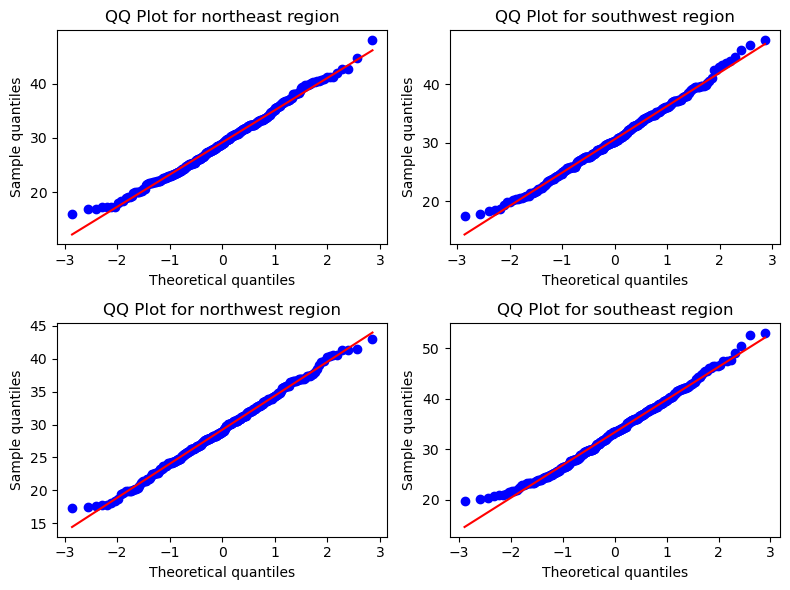

In [40]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot Q-Q plots for each category
stats.probplot(df[df['region'] == 'northeast']['bmi'], dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('QQ Plot for northeast region')
axs[0, 0].set_xlabel('Theoretical quantiles')
axs[0, 0].set_ylabel('Sample quantiles')

stats.probplot(df[df['region'] == 'southwest']['bmi'], dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('QQ Plot for southwest region')
axs[0, 1].set_xlabel('Theoretical quantiles')
axs[0, 1].set_ylabel('Sample quantiles')

stats.probplot(df[df['region'] == 'northwest']['bmi'], dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('QQ Plot for northwest region')
axs[1, 0].set_xlabel('Theoretical quantiles')
axs[1, 0].set_ylabel('Sample quantiles')

stats.probplot(df[df['region'] == 'southeast']['bmi'], dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('QQ Plot for southeast region')
axs[1, 1].set_xlabel('Theoretical quantiles')
axs[1, 1].set_ylabel('Sample quantiles')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


distribution is almsot normal

In [41]:
F_statistic, p_value=f_oneway(northeast_bmi, southwest_bmi, northwest_bmi, southeast_bmi )

# Print results
print("F-statistic:", round(F_statistic,4))
print("p-value:", round(p_value,4))

F-statistic: 39.4951
p-value: 0.0


p value is less than 0.05 so we reject null hypothesis and conclude there is significant effect of region on bmi lets keep this in mind while building regression model

In [42]:
model =ols('bmi~C(region)',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     39.50
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           1.88e-24
Time:                        12:06:30   Log-Likelihood:                -4260.2
No. Observations:                1338   AIC:                             8528.
Df Residuals:                    1334   BIC:                             8549.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 29

region[T.northwest]: The coefficient is 0.0263 with a large standard error (0.459) and a very high p-value (0.954). This indicates that the effect of being in the Northwest region on BMI is not statistically significant.

region[T.southeast]: The coefficient is 4.1825 with a standard error of 0.447 and a very low p-value (< 0.001). This suggests that individuals in the Southeast region have a statistically significantly higher BMI compared to the baseline region (northeast).

region[T.southwest]: The coefficient is 1.4231 with a standard error of 0.459 and a p-value of 0.002. This indicates that individuals in the Southwest region have a statistically significantly higher BMI compared to the baseline region (northeast).

Over all effect of rgion on bmi

The R-squared value of 0.082 suggests that the model explains 8.2% of the variance in BMI, indicating a weak relationship between the regions and BMI.

Adjusted R-squared (0.080) is similar to R-squared, suggesting that adding region variables did not significantly improve the model's explanatory power

We may not face multicolinearity but lets see while building model

#### effect of children on bmi

In [43]:
bmi_children_0 = df[df['children'] == 0]['bmi']
bmi_children_1 = df[df['children'] == 1]['bmi']
bmi_children_2 = df[df['children'] == 2]['bmi']
bmi_children_3 = df[df['children'] == 3]['bmi']
bmi_children_4 = df[df['children'] == 4]['bmi']
bmi_children_5 = df[df['children'] == 5]['bmi']

In [44]:
max(bmi_children_0.var(),bmi_children_1.var(),bmi_children_2.var(),bmi_children_3.var(),bmi_children_4.var(),bmi_children_5.var())/min(bmi_children_0.var(),bmi_children_1.var(),bmi_children_2.var(),bmi_children_3.var(),bmi_children_4.var(),bmi_children_5.var())

2.380781929725234

variance is almost constant according to thumb rule

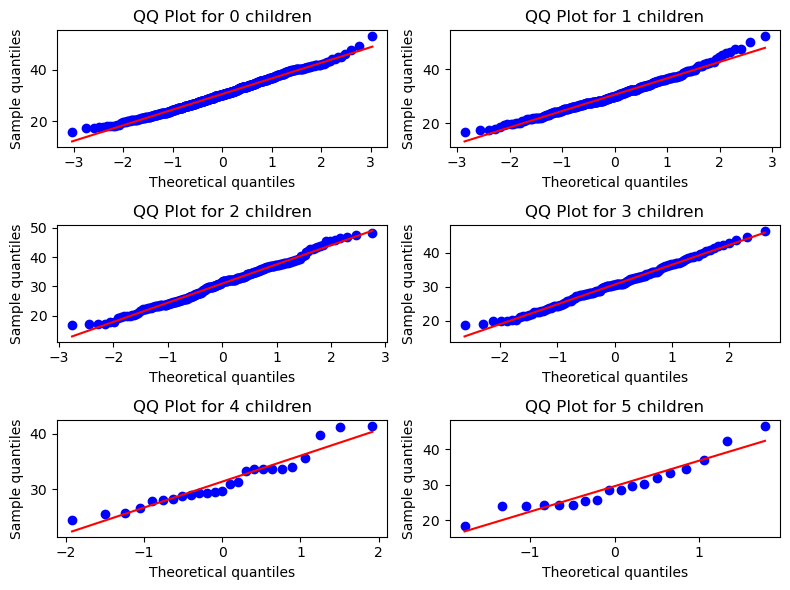

In [45]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Plot Q-Q plots for each category
stats.probplot(bmi_children_0, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('QQ Plot for 0 children')
axs[0, 0].set_xlabel('Theoretical quantiles')
axs[0, 0].set_ylabel('Sample quantiles')

stats.probplot(bmi_children_1, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('QQ Plot for 1 children')
axs[0, 1].set_xlabel('Theoretical quantiles')
axs[0, 1].set_ylabel('Sample quantiles')

stats.probplot(bmi_children_2, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('QQ Plot for 2 children')
axs[1, 0].set_xlabel('Theoretical quantiles')
axs[1, 0].set_ylabel('Sample quantiles')

stats.probplot(bmi_children_3, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('QQ Plot for 3 children')
axs[1, 1].set_xlabel('Theoretical quantiles')
axs[1, 1].set_ylabel('Sample quantiles')

stats.probplot(bmi_children_4, dist="norm", plot=axs[2, 0])
axs[2, 0].set_title('QQ Plot for 4 children')
axs[2, 0].set_xlabel('Theoretical quantiles')
axs[2, 0].set_ylabel('Sample quantiles')

stats.probplot(bmi_children_5, dist="norm", plot=axs[2, 1])
axs[2, 1].set_title('QQ Plot for 5 children')
axs[2, 1].set_xlabel('Theoretical quantiles')
axs[2, 1].set_ylabel('Sample quantiles')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [46]:
F_statistic, p_value=f_oneway(bmi_children_0 ,
bmi_children_1,
bmi_children_2,
bmi_children_3,
bmi_children_4,
bmi_children_5)

# Print results
print("F-statistic:", round(F_statistic,4))
print("p-value:", round(p_value,4))

F-statistic: 0.3493
p-value: 0.8829


There is no significant effect of childrens on  bmi

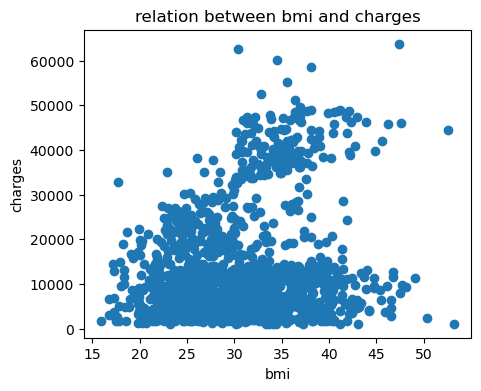

In [47]:
plt.figure(figsize=(5,4))
plt.scatter(df['bmi'],df['charges'])
plt.title('relation between bmi and charges')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

Bmi is almost normally distributed with few outliers and there is no any sharp relation between bmi and charges.

In [48]:
lr=LinearRegression()
lr.fit(df[['bmi']],df[['charges']])
prdct=lr.predict(df[['bmi']])
r2_score(df[['charges']],prdct)

0.03933913991786253

r2 score is too low looks like bmi alone has less contribution in prediction of charges

### Analysing sex   and sex vs charges

In [49]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of charges based on sex')

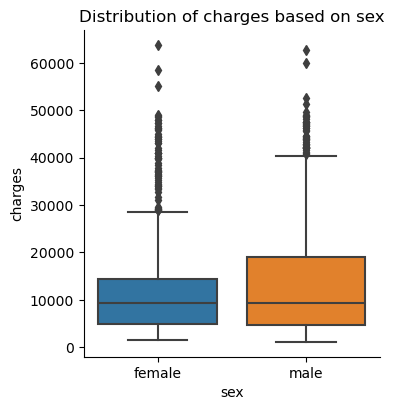

In [50]:
sns.catplot(y='charges',x='sex',data=df,kind='box',height=4,aspect=1)
plt.title('Distribution of charges based on sex')

Looks like there is slight effect of sex on insurance charges (Lets carry out t test to find out whether the difference is significant or not).
and category is well balanced

In [51]:
# since charges is not normally distributed we make use of nonparametric alternative to t test

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(df[df['sex']=='male']['charges'] , df[df['sex']=='female']['charges'])

# Print results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the groups.")


Mann-Whitney U statistic: 226208.0
P-value: 0.7286510894470093
Fail to reject null hypothesis: There is no significant difference between the groups.


In [52]:
from scipy.stats import chi2_contingency

observed = pd.crosstab(df['sex'], df['smoker'])

# Perform Chi-square test for independence
statistic, p_value, dof, expected = chi2_contingency(observed)

# Print results
print("Chi-square statistic:", statistic)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject null hypothesis: There is no significant association between the variables.")


Chi-square statistic: 7.39291081459996
P-value: 0.006548143503580696
Degrees of freedom: 1
Expected frequencies:
 [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
Reject null hypothesis: There is a significant association between the variables.


In [53]:
observed

smoker,no,yes
sex,,
female,547,115
male,517,159


Looks like there is relation between sex and smoker variable lets keep this in mind whille building model

In [54]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [55]:
observed = pd.crosstab(df['sex'], df['children'])

# Perform Chi-square test for independence
statistic, p_value, dof, expected = chi2_contingency(observed)

# Print results
print("Chi-square statistic:", statistic)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject null hypothesis: There is no significant association between the variables.")

Chi-square statistic: 0.7352123565685106
P-value: 0.9809803915285088
Degrees of freedom: 5
Expected frequencies:
 [[283.99701046 160.30493274 118.74439462  77.67862481  12.36920777
    8.9058296 ]
 [290.00298954 163.69506726 121.25560538  79.32137519  12.63079223
    9.0941704 ]]
Fail to reject null hypothesis: There is no significant association between the variables.


In [56]:
observed = pd.crosstab(df['sex'], df['region'])

# Perform Chi-square test for independence
statistic, p_value, dof, expected = chi2_contingency(observed)

# Print results
print("Chi-square statistic:", statistic)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject null hypothesis: There is no significant association between the variables.")

Chi-square statistic: 0.43513679354327284
P-value: 0.9328921288772233
Degrees of freedom: 3
Expected frequencies:
 [[160.30493274 160.79970105 180.09566517 160.79970105]
 [163.69506726 164.20029895 183.90433483 164.20029895]]
Fail to reject null hypothesis: There is no significant association between the variables.


### analysing children 

In [57]:
df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Text(0.5, 1.0, 'distribution of charge based on no.of children covered in insurance')

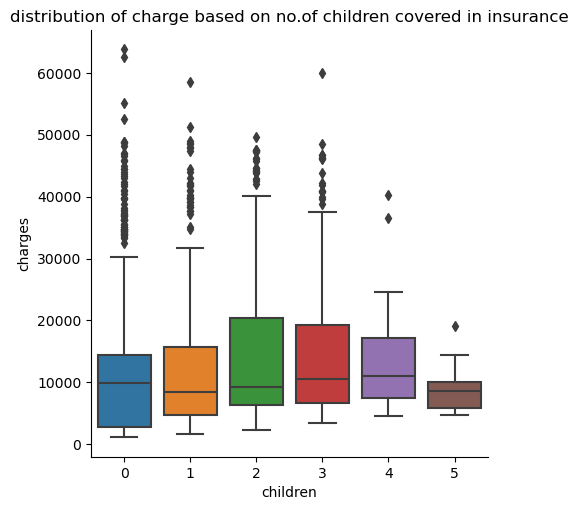

In [58]:
sns.catplot(x='children',y='charges',data=df,kind='box')
plt.title('distribution of charge based on no.of children covered in insurance')

There are very less observation for children count 5 and 4

In [59]:
# Fit OLS regression model with automatic intercept and categorical handling
model = ols('charges ~ C(children)', data=df).fit()

# Print summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.297
Date:                Fri, 12 Jul 2024   Prob (F-statistic):            0.00579
Time:                        12:06:31   Log-Likelihood:                -14469.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1332   BIC:                         2.898e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.237e+04    503.305  

observation with 2 and 3 chilren varry signifiacntly from observation with 0 childre but r squared value is quite low looks like there is no significant efffect of children variable on charges.

In [60]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [61]:
observed = pd.crosstab(df['children'], df['region'])

# Perform Chi-square test for independence
statistic, p_value, dof, expected = chi2_contingency(observed)

# Print results
print("Chi-square statistic:", statistic)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject null hypothesis: There is no significant association between the variables.")

Chi-square statistic: 13.772791061803561
P-value: 0.5428263602033943
Degrees of freedom: 15
Expected frequencies:
 [[138.9955157  139.4245142  156.1554559  139.4245142 ]
 [ 78.4573991   78.69955157  88.14349776  78.69955157]
 [ 58.11659193  58.29596413  65.29147982  58.29596413]
 [ 38.01793722  38.13527653  42.71150972  38.13527653]
 [  6.05381166   6.07249626   6.80119581   6.07249626]
 [  4.35874439   4.37219731   4.89686099   4.37219731]]
Fail to reject null hypothesis: There is no significant association between the variables.


In [62]:
observed = pd.crosstab(df['children'], df['smoker'])

# Perform Chi-square test for independence
statistic, p_value, dof, expected = chi2_contingency(observed)

# Print results
print("Chi-square statistic:", statistic)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject null hypothesis: There is no significant association between the variables.")

Chi-square statistic: 6.887719904947631
P-value: 0.22912555089568779
Degrees of freedom: 5
Expected frequencies:
 [[456.45440957 117.54559043]
 [257.65022422  66.34977578]
 [190.85201794  49.14798206]
 [124.8490284   32.1509716 ]
 [ 19.88041854   5.11958146]
 [ 14.31390135   3.68609865]]
Fail to reject null hypothesis: There is no significant association between the variables.


In [63]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### smoker

In [64]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

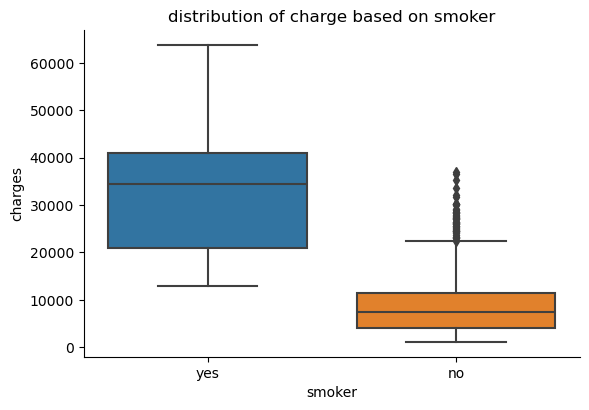

In [65]:

sns.catplot(x='smoker',y='charges', data=df, kind='box', height=4, aspect=1.5)
plt.title('distribution of charge based on smoker')
plt.show()

smoker class is imbalance we have more observations for non smokers and distribution of charges is high for people with smoking habbit.
Insurance cost is high for smokers than non smokers.

In [66]:
model = ols('charges ~ C(smoker)', data=df).fit()

# Print summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):          8.27e-283
Time:                        12:06:31   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8434.2683    229.014  

adjusted r square value is 0.6 looks like there is smoker variable contributees well in predicting charge and coefficient is significant 

#### region

In [67]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Text(0.5, 1.0, 'distribution of charge based on region')

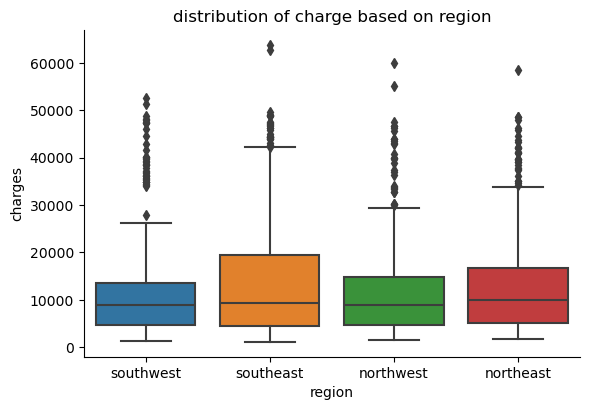

In [68]:
sns.catplot(x='region',y='charges',data=df,kind='box',height=4, aspect=1.5)
plt.title('distribution of charge based on region')

region categories are well balanced distribution of charges in southeast region is slightly high but previously we have observed that smoker with yes has high distribution of charges let check whether smokers count is high in southeast region

In [69]:
df.groupby(['region'])['smoker'].value_counts()

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: count, dtype: int64

among all the regions southeast has high number of smokers this might causing high distribution of charge in southeast region.

In [70]:
model = ols('charges ~ C(region)', data=df).fit()

# Print summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.970
Date:                Fri, 12 Jul 2024   Prob (F-statistic):             0.0309
Time:                        12:06:31   Log-Likelihood:                -14473.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1334   BIC:                         2.898e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.34

r square and adjusted r square are too low and ceofficiets for region categories are not significant looks like there is no significant contribution of region in predicting charges

#### encoding categorical variables

In [71]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [72]:
#lets create dummies for categorical values
dummy=pd.get_dummies(df[['sex','smoker','region']])
dummy.head(4)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,True,False,False,True,False,False,False,True
1,False,True,True,False,False,False,True,False
2,False,True,True,False,False,False,True,False
3,False,True,True,False,False,True,False,False


In [73]:
#lets drop categorical variable in main data frame
df.drop(['sex','smoker','region'],inplace=True,axis='columns')


In [74]:
#lets check whether they got droped or not
df.head(3)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


In [75]:
#lets drop one column from each category dummy variable to avoid multicolinearity and merge dummy and df
df[['sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']]=dummy[['sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']]

In [76]:
#lets see how they merged
df.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,False,True,False,False,True
1,18,33.77,1,1725.5523,True,False,False,True,False


###  Capping / winsorize for outliers

In [77]:
for i in ['age','bmi'] : 
    upper_limit=df[i].quantile(0.95)
    lower_limit=df[i].quantile(0.05)

    df[i] = np.where(df[i]>upper_limit, upper_limit , np.where(df[i]<lower_limit , lower_limit,df[i]))


upper_limit=df['charges'].quantile(0.895)
lower_limit=df['charges'].quantile(0.05)
df['charges']=np.where(df['charges']>upper_limit, upper_limit , np.where(df['charges']<lower_limit , lower_limit,df['charges']))


In [78]:
df['charges']

0       16884.92400
1        1757.75340
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1757.75340
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [79]:
#lets save this data as cleaned so in future when we open notebook we can directly continue from here

df.to_csv("cleaned.csv")

In [80]:
#lets import leaned data

cleaned=pd.read_csv("cleaned.csv")
cleaned.drop(['Unnamed: 0'],axis='columns',inplace=True)


In [81]:
cleaned.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.90,0,16884.9240,False,True,False,False,True
1,18.0,33.77,1,1757.7534,True,False,False,True,False


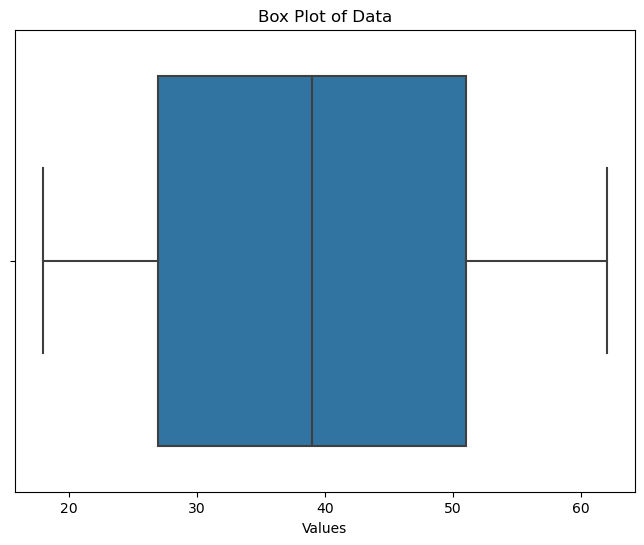

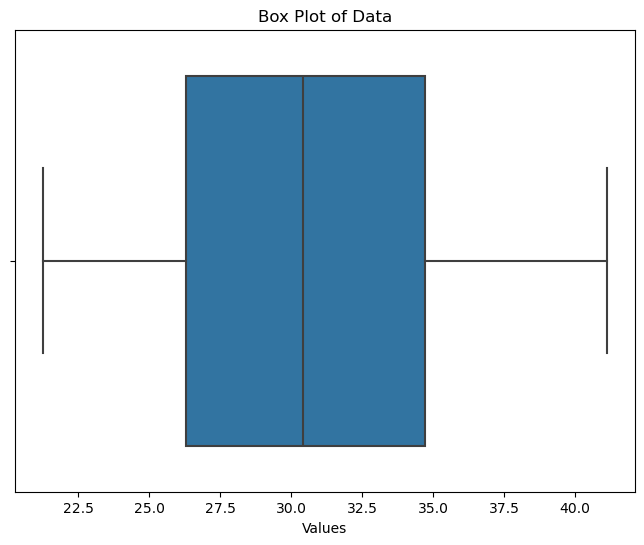

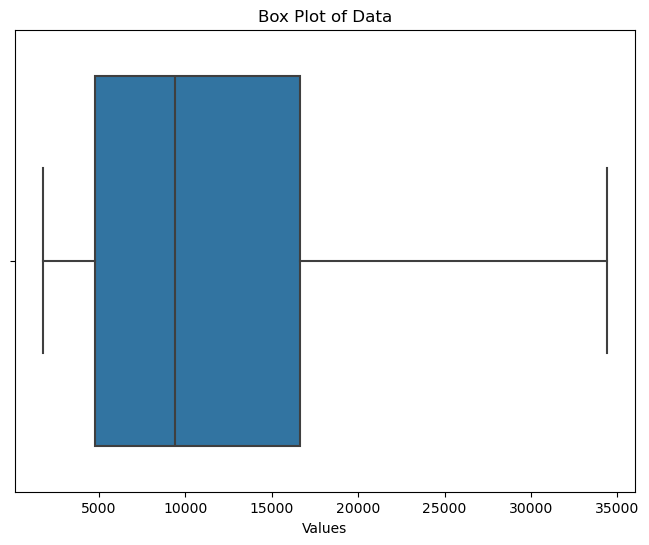

In [82]:
for i in ['age','bmi','charges']:
    data = cleaned[i]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data)
    plt.title('Box Plot of Data')
    plt.xlabel('Values')
    plt.show()

In [83]:
cleaned.iloc[:,4:]=cleaned.iloc[:,4:].applymap(lambda x: 1 if x else 0)

In [84]:
cleaned.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.90,0,16884.9240,0,1,0,0,1
1,18.0,33.77,1,1757.7534,1,0,0,1,0


In [85]:
#lets seperate x and y

x=cleaned.drop(['charges'],axis=1)
y=cleaned[['charges']]


In [86]:
#split the data into test and train set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [87]:
def forward_selection(X,y,p_threshold=0.05):
    
    import statsmodels.api as sm
    import numpy as np
    
    
    feature=[]
    
    def look():
        
        variable=[]
        t_=[]
        p=[]
        
        for i in X.columns:
            if i not in feature:
                if not feature:
                    model=sm.OLS(y,sm.add_constant(X[[i]])).fit()
                else:
                    model=sm.OLS(y,sm.add_constant(pd.concat([X[feature],X[[i]]],axis=1))).fit()
                    
                t=model.summary().tables[1].data[-1][3]
                variable.append(i)
                t_.append(np.absolute(float(t)))
                p.append(float(model.summary().tables[1].data[-1][4]))
                
        df=pd.DataFrame({'var':variable,'t':t_,'p':p}).sort_values(by='t',ascending=False)
        
        if not df.empty and df.iloc[0,2]<p_threshold:
            feature.append(df.iloc[0,0])
            return look()
        
        else:
            return feature
    
    return look()
    
    
clmn=forward_selection(x_train,y_train)
clmn  

['smoker_yes', 'age', 'bmi', 'children']

Lets test our selection using mlxtend forward selection method

In [88]:
lreg = LinearRegression()

sfs1=sfs(lreg,k_features=4,verbose=2,scoring='neg_mean_squared_error')

sfs1.fit(x_train,y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2024-07-12 12:06:32] Features: 1/4 -- score: -39458680.21496392[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2024-07-12 12:06:32] Features: 2/4 -- score: -28034440.431019247[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2024-07-12 12:06:32] Features: 3/4 -- score: -26435954.55820868[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(4, 4),
                          scoring='neg_mean_squared_error', verbose=2)

In [89]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['age', 'bmi', 'children', 'smoker_yes']


By observing the selections made by both mlxtend and the F-statistic (or p-value), the same variable was chosen

#### Let us try  applying log and square transformation on age data

In [90]:
#Define Transforamation function


import scipy.stats as sp
def apply_transformation(df,transformer,col):
    print("before transforming the {0} col".format(col))
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    sp.probplot(df[col],rvalue=True,dist='norm',plot=plt)
    plt.xlabel(col)
    plt.show()
    
    print("After transformnin the {0} column".format(col))
    trf_col=transformer.fit_transform(df[col])
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    sns.distplot(trf_col)
    plt.subplot(132)
    sns.boxplot(trf_col)
    plt.subplot(133)
    sp.probplot(trf_col,rvalue=True,dist='norm',plot=plt)
    plt.xlabel(col)
    plt.show()
    return trf_col

before transforming the age col


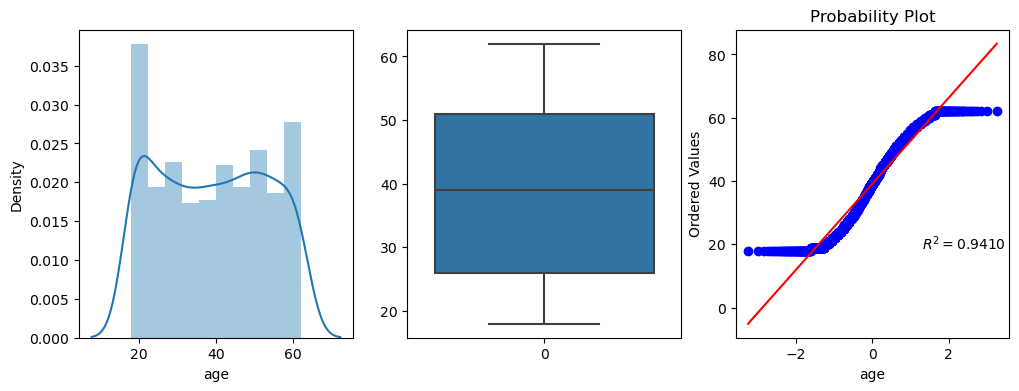

After transformnin the age column


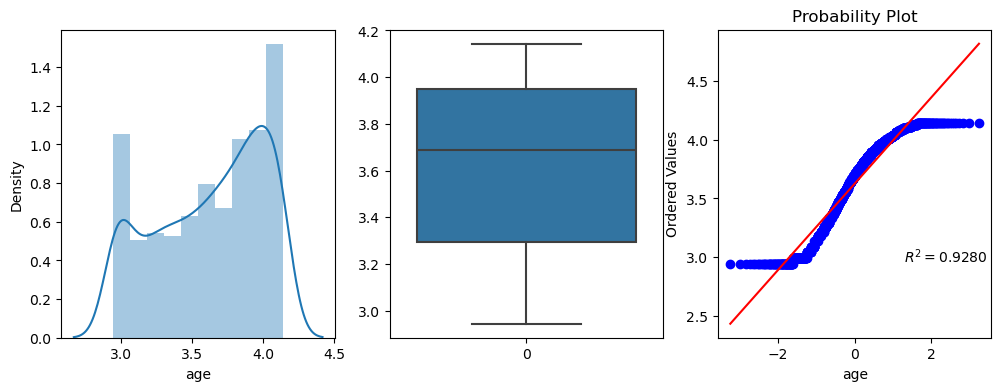

In [91]:
# Log transformation

log=apply_transformation(x_train, FunctionTransformer(np.log1p)  , 'age')

In [92]:
log_test=FunctionTransformer(np.log1p).fit_transform(x_test['age'])

before transforming the age col


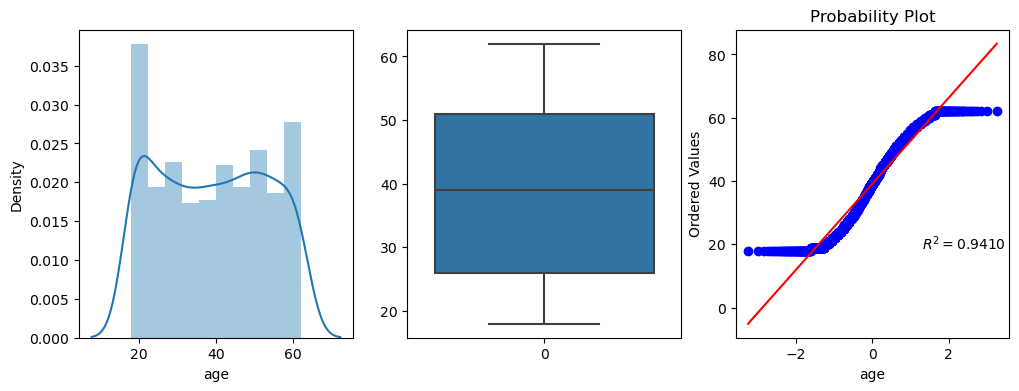

After transformnin the age column


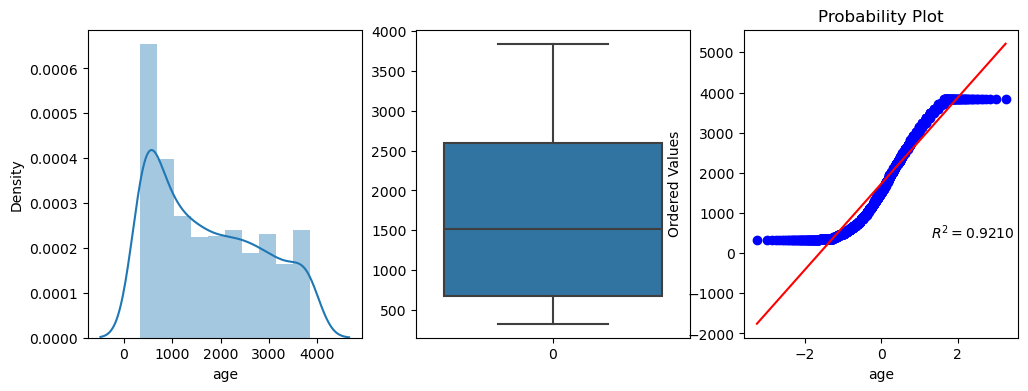

In [93]:
#square transformation on train data
sqr=apply_transformation(x_train, FunctionTransformer(np.square)  , 'age')


In [94]:
#square transformation on test data
sqr_test=FunctionTransformer(np.square).fit_transform(x_test['age'])


#### let us fit  regression model on selected variable and lets test it's performance

In [95]:
def rg(x,y,x_test,y_test):
    lreg=LinearRegression()
    lreg.fit(x,y)
    y_pred=lreg.predict(x)
   
    r2 = round(r2_score(y,y_pred),4)
    n=x.shape[0]
    p=4
    adjusted_r = 1-((1-r2)*((n-1)/(n-p-1)))

    print("Performance on Train Data")
    print('MSE' , mean_squared_error(y,y_pred))
    print('adjusted_r' , round(adjusted_r,4))
    print('r' , r2)
    print()
    print("_________________________________________________________________")
    print()

    print("Performance on Test Data")
    y_test_pred=lreg.predict(x_test)
    r2 = round(r2_score(y_test,y_test_pred),4)
    n=x_test.shape[0]
    p=4
    adjusted_r = 1-((1-r2)*((n-1)/(n-p-1)))

    print('MSE' , mean_squared_error(y_test,y_test_pred))
    print('adjusted_r' , round(adjusted_r,4))
    print('r' , r2)
    

#### First let us fit model on untransformed data

In [96]:
rg(x_train[['age','bmi','children','smoker_yes']],y_train,x_test[['age','bmi','children','smoker_yes']],y_test)

Performance on Train Data
MSE 26067580.745941855
adjusted_r 0.7445
r 0.7453

_________________________________________________________________

Performance on Test Data
MSE 24538209.491965763
adjusted_r 0.7534
r 0.7608


### Lets fit by using square transformed age

In [97]:
x_test_square=pd.merge(pd.DataFrame({'sqr':sqr_test}),x_test[['bmi','children','smoker_yes']], left_index=True, right_index=True)

In [98]:
x_train_square=pd.merge(pd.DataFrame({'sqr':sqr}),x_train[['bmi','children','smoker_yes']], left_index=True, right_index=True)

rg(x_train_square,y_train,x_test_square,y_test)

Performance on Train Data
MSE 25694120.055844296
adjusted_r 0.7482
r 0.749

_________________________________________________________________

Performance on Test Data
MSE 24123466.55607876
adjusted_r 0.7576
r 0.7649


####   Lets fit by using log transformed age

In [99]:
x_train_log =  pd.merge(x_train[['bmi','children','smoker_yes']],pd.DataFrame({'log':log}), left_index=True, right_index=True   )

x_test_log  =  pd.merge(x_test[['bmi','children','smoker_yes']],pd.DataFrame({'log':log_test}), left_index=True, right_index=True   )

rg(x_train_log,y_train,x_test_log,y_test)

Performance on Train Data
MSE 26867564.0953908
adjusted_r 0.7366
r 0.7375

_________________________________________________________________

Performance on Test Data
MSE 25480964.227577858
adjusted_r 0.7439
r 0.7516


before transforming the bmi col


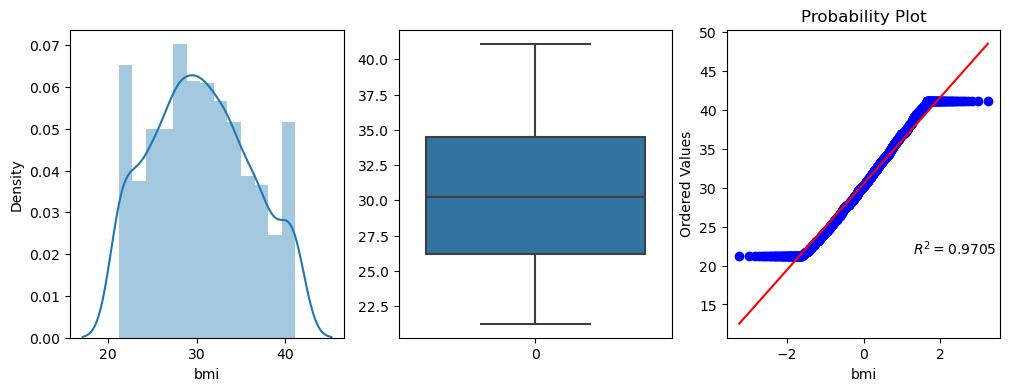

After transformnin the bmi column


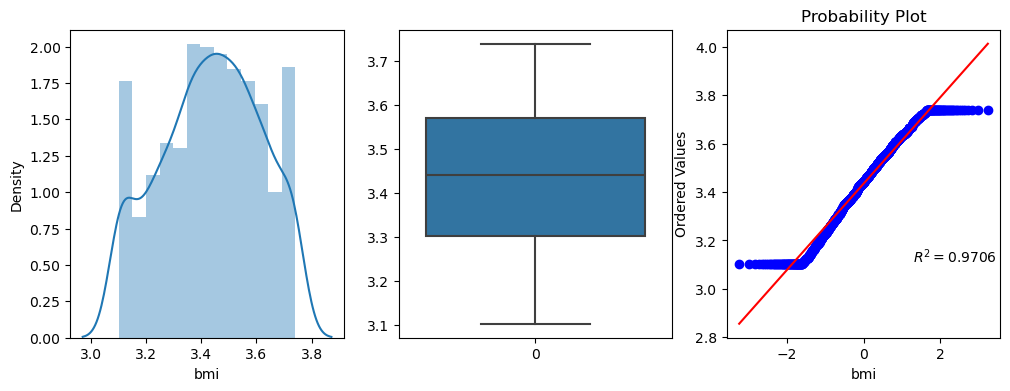

In [100]:
log_bmi_train=apply_transformation(x_train, FunctionTransformer(np.log1p)  , 'bmi')

before transforming the bmi col


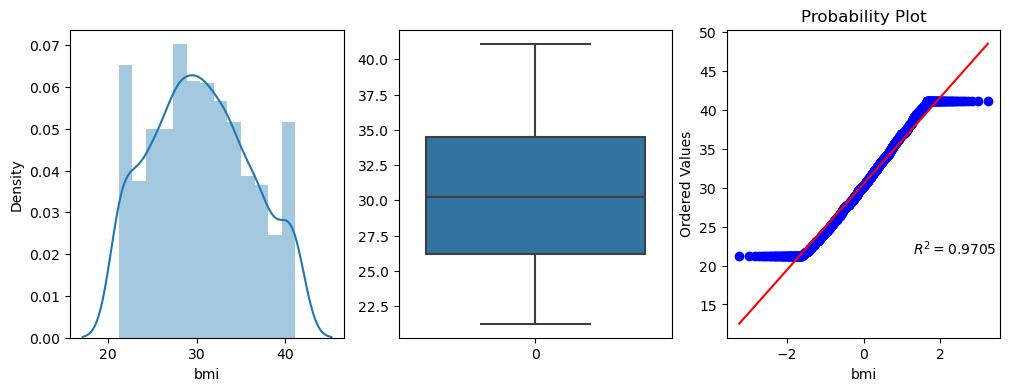

After transformnin the bmi column


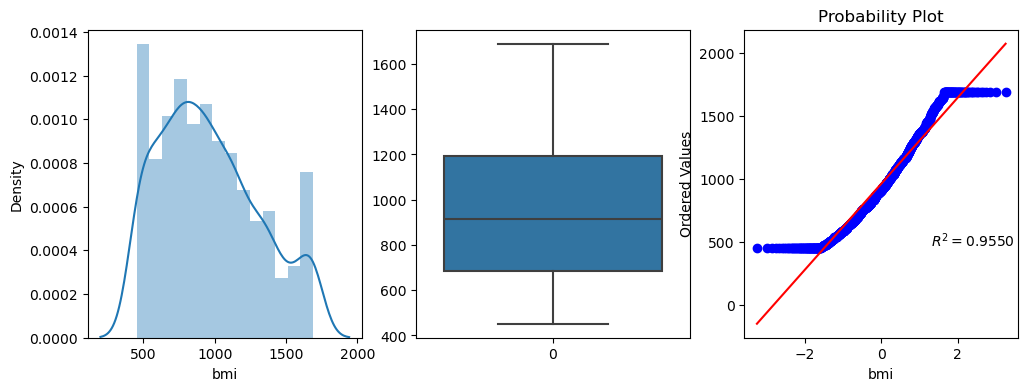

In [101]:
sqr_bmi_train=apply_transformation(x_train, FunctionTransformer(np.square) , 'bmi')

In [102]:
log_bmi_test = FunctionTransformer(np.log1p).fit_transform(x_test['bmi'])

In [103]:
sqr_bmi_test = FunctionTransformer(np.square).fit_transform(x_test['bmi'])

In [104]:
x_train_square['bmi']= log_bmi_train
x_test_square['bmi']=log_bmi_test

In [105]:
#log transformed bmi with square transformed age

rg(x_train_square,y_train,x_test_square,y_test)

Performance on Train Data
MSE 25614324.37736871
adjusted_r 0.7489
r 0.7497

_________________________________________________________________

Performance on Test Data
MSE 24013136.99852339
adjusted_r 0.7586
r 0.7659


In [106]:
x_train_square['bmi']=sqr_bmi_train
x_test_square['bmi']=sqr_bmi_test

In [107]:
#square transformed bmi with square transformed age

rg(x_train_square,y_train,x_test_square,y_test)

Performance on Train Data
MSE 25808180.02346374
adjusted_r 0.747
r 0.7478

_________________________________________________________________

Performance on Test Data
MSE 24271098.509784292
adjusted_r 0.7561
r 0.7634


comparing mse, r value and r adjusted performance of model fited on log transformed bmi with square transformed age , children and smoker_yes is performing good lets carry out futher analysis on this model.

In [108]:
x_train=(x_train[['children','smoker_yes']]).merge(pd.DataFrame({'age':sqr}) ,left_index=True, right_index = True)
x_train=x_train.merge(pd.DataFrame({'bmi':log_bmi_train}) ,left_index=True, right_index = True)
x_train.head(3)

,children,smoker_yes,age,bmi
196,0,0,1521.0,3.520461
1209,1,0,3481.0,3.640214
353,0,0,1089.0,3.590301


In [109]:
x_test=(x_test[['children','smoker_yes']]).merge(pd.DataFrame({'age':sqr_test}) ,left_index=True, right_index = True)
x_test=x_test.merge(pd.DataFrame({'bmi':log_bmi_test}) ,left_index=True, right_index = True)
x_test

,children,smoker_yes,age,bmi
764,2,0,2025.0,3.264805
887,0,0,1296.0,3.434632
890,0,1,3844.0,3.328089
1293,3,0,2116.0,3.286348
259,0,1,361.0,3.494080
...,...,...,...,...
358,0,0,529.0,3.740190
551,0,0,1024.0,3.398861
778,3,0,1225.0,3.564449
1127,2,0,1225.0,3.607127


### fit the regression using the sklearn

In [110]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)


LinearRegression()

In [111]:
y_pred=lreg.predict(x_train)

In [112]:
print('Mean square Error (MsE):', round(mean_squared_error(y_train, y_pred),3))  
print('Mean square Error (MRSE):', np.sqrt(round(mean_squared_error(y_train, y_pred),3)))

r_square=round(r2_score(y_train, y_pred),5)
print('R2_score:',r_square) 

n=x_train.shape[0]
k=x_train.shape[1]
adjusted_r_squared = 1 - ((1 - r_square) * (n - 1) / (n - k - 1))
print("Adjusted r2_score",round(adjusted_r_squared,5))

Mean square Error (MsE): 25614324.377
Mean square Error (MRSE): 5061.059610101426
R2_score: 0.74973
Adjusted r2_score 0.7489


## Checking assumptions

In [113]:
#calculating the actual and predict value of insurance cost
result=pd.DataFrame({"predicted":y_pred.flatten(),"actual":y_train['charges'].to_numpy()})
result.head()

,predicted,actual
0,7844.638127,5649.715000
1,14905.793119,12347.172000
2,7081.834703,12404.879100
3,27864.532043,22144.032000
4,30149.154788,34387.230751


In [114]:
#residual

residuals = result['actual']-result['predicted']

### 1) Linearity 
This assumes that there is Relationship between the independent (predictor or feature) and dependent(response) variable.

#### What it will effect ,
The prediction will be extremely inaccurate because our model is underfitting. This is a serious violation that should not be ignored.

#### How to detect it ,
By using a simple scatter plot can find the relationship between the dependent and independent variable.

Also we can done by ploting a regrssion plot (actual and predicted). which the points should lie on or around a diagonal line.

By looking the coffecient of each regressor can find the relationship

#### How to fix it ,
Adding polynomial terms to some of the predictors or applying nonlinear transformations

In [115]:
#linearity
def check_linearity(data,x,y):
    plt.figure(figsize=(6,4))
    sns.regplot(x=x,y=y,data=data)
    plt.grid(visible=True)
    plt.title("Actual and Predicted")
    

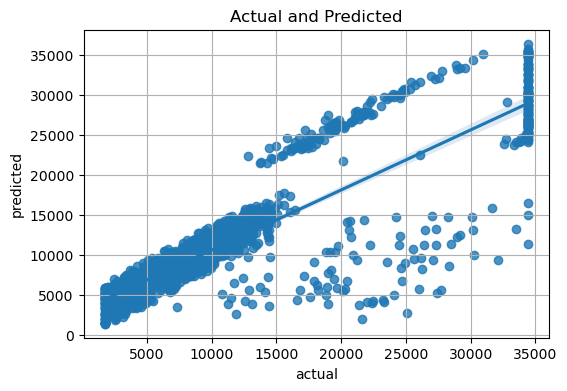

In [116]:
check_linearity(result,"actual","predicted")

model is not performing well after 15000 charge

## 2) Normality of the Error Terms

This assumes that the error terms of the model are normally distributed.

####  What it will effect

The estimates of the regression coefficients may still be unbiased, but they may not be as efficient or have the minimum variance properties.

Standard errors are used to calculate confidence intervals and conduct hypothesis tests. If the errors are not normally distributed, the standard errors may be biased, leading to incorrect conclusions about the statistical significance of the coefficients.

Confidence intervals may be wider or narrower .

#### How to detect it 

By plotting the histogram of residuals

By ploting the Q-Q plot of the residuals

####  How to fix it 

By removing the outliers will solve this problem.

Non linear transformation of the variable.

In [117]:
#error should be normally distributed
def check_normallity_errors(residuals):
    plt.figure(figsize=(5,4))
    sns.distplot(residuals)
    plt.grid(visible=True)
    plt.title("normal distribution of error")
    plt.show()
    
    plt.figure(figsize=(5,4))
    sp.probplot(residuals,dist="norm",plot=plt)
    plt.title("Q-Q plot of error")
    plt.show()

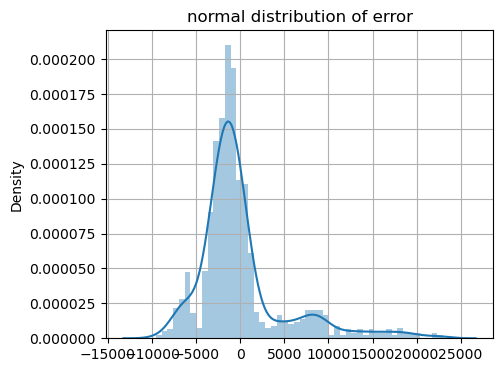

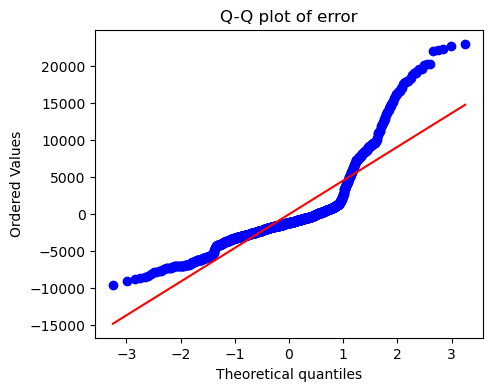

In [118]:
check_normallity_errors(residuals)

errors are not normally distributed

## 3) Multicollinearity

This assumes that the predictors used in the regression are not correlated with each other.This won’t cause our model unusable if violated, but it will cause issues with the interpretability of the model.

#### What it will effect 
    
Affects the inference drawn from the estimated regression model.
The presence of multicollinearity has a serious effect on the least square estimates of the regression coefficients.

#### How to detect it 
    
Examination of the correlation Matrix

Using the Variance Inflation Factor

Eigensystem Analysis

#### How to fix it 

Drop some of the variables which cause the high collinearity.

Use regularization methods like Ridge Regression or Lasso Regression.

Use of principal component regression.

In [119]:
def check_multicollinearity(X):

    print("Variance inflation factor (VIF)")
    vif_values = [vif(X,i) for i in range(len(X.columns))]

    vif_result=pd.DataFrame()
    vif_result["col_nanme"]=X.columns
    vif_result["VIF"]=vif_values
    return vif_result

In [120]:
check_multicollinearity(x_train)

Variance inflation factor (VIF)


,col_nanme,VIF
0,children,1.799100
1,smoker_yes,1.261330
2,age,3.458613
3,bmi,4.534225


vif is between 1 and 5. The variance inflation is moderate and may not significantly affect the estimates.

## 4) Autocorrelation

This assumes no autocorrelation of the error terms. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

### What it will effect 
    
This will impact our model estimates.

### How to detect it 

Using Durbin_Wastons test (D-W test)

### How to fix it 

Increasing the sample size might help reduce the impact of autocorrelation.

By adding lag variables can fix this problem 

In [121]:
#Durbin-Waston test
def check_autocorrelation(residuals):
    durbinWatson = durbin_watson(residuals)
    print("D-W test statistic :",durbinWatson)
    if(np.round(durbinWatson,1)<2):
        print("positive autocorrelation")
    elif(np.round(durbinWatson,1)>2):
        print("negative autocorrelation")
    else:
        print("There is no autocorrelation")

In [122]:
check_autocorrelation(residuals)

D-W test statistic : 2.069408671994783
negative autocorrelation


d = 2: Indicates no autocorrelation.

0 < d < 2: Indicates positive autocorrelation (residuals are positively correlated).

2 < d < 4: Indicates negative autocorrelation (residuals are negatively correlated).

d = 0 or d = 4: Indicates strong positive or negative autocorrelation, respectively


well value is close to 2 we can assume there is no auto correlation

###   5) Homoscedasticity

This assumes that constant variance within the error terms is called homoscedasticity and the disturbance are termed as homoscedastic disturbance.

#### WHat it will effect

The standard error may be biased, leading to incorrect conclusions about the statistical significance of the coefficients.

Confidence intervals may be wider or narrower.

#### How to detect it

By plot the residuals.
Goldfeld-Quandt test.

#### How to fix it

By removing the skewness in the distribution.
Avoid incorrect data transformation and incorect functional form of the model


In [123]:
def check_homoscedasticity(result,residuals):
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=result.index, y=residuals, alpha=0.5)
    plt.plot(np.repeat(0, result.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

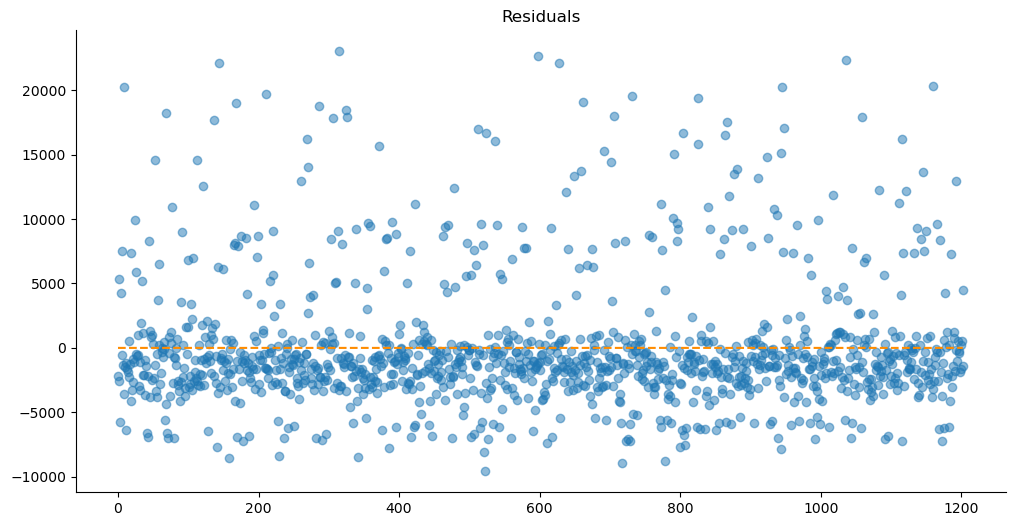

In [124]:
check_homoscedasticity(result,residuals)

#### By examining the results above, it appears that the residuals are consistently distributed. In other words, there is a uniform or constant pattern observed in the distribution of residuals. 

In [125]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [126]:
x_test_poly.shape

(134, 15)

In [138]:
def reg(x_poly, y_train):
    lreg = LinearRegression()
    lreg.fit(x_poly,y_train)
    y_pred=lreg.predict(x_poly)
    print('Mean square Error (MsE):', round(mean_squared_error(y_train, y_pred),3))  
    print('Mean square Error (MRSE):', np.sqrt(round(mean_squared_error(y_train, y_pred),3)))
    
    r_square=round(r2_score(y_train, y_pred),5)
    print('R2_score:',r_square) 
    
    n=x_poly.shape[0]
    k=x_poly.shape[1]
    adjusted_r_squared = 1 - ((1 - r_square) * (n - 1) / (n - k - 1))
    print("Adjusted r2_score",round(adjusted_r_squared,5))
    return y_pred

In [141]:
# poly transformation on train data

y_train_pred=reg(x_poly , y_train)
print()
print("____________________________________")
print()
y_test_pred=reg(x_test_poly,y_test)

Mean square Error (MsE): 0.0
Mean square Error (MRSE): 0.0
R2_score: 1.0
Adjusted r2_score 1.0

____________________________________

Mean square Error (MsE): 16217889.522
Mean square Error (MRSE): 4027.1440900469406
R2_score: 0.84193
Adjusted r2_score 0.82184


There is significant increase in model performance after polynomial transformation

Lets look for assumption and lets check for the parameter efficiency

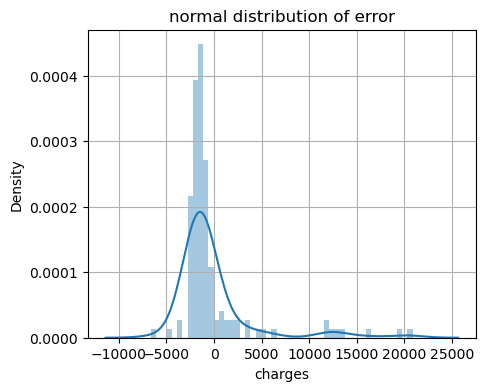

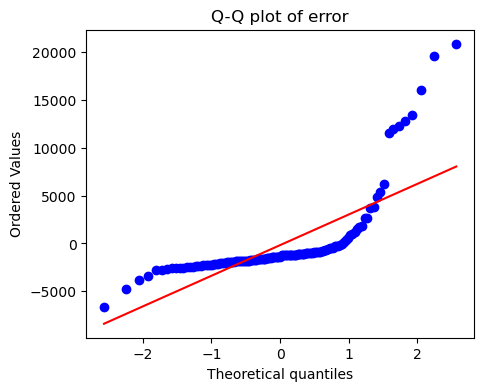

In [128]:
residuals2=y_test['charges']-y_pred.flatten()
check_normallity_errors(residuals2)


In [134]:
# Add a constant to the predictor variables (intercept term)
X = sm.add_constant(x_poly)

# Fit the OLS model
model = sm.OLS(y_train, x_poly).fit()
# Print a summary of the regression results
print(model.summary())

# Access specific attributes of the model
print('Parameters:', model.params)
print('R-squared:', model.rsquared)
print('P-values:', model.pvalues)


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     386.0
Date:                Fri, 12 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:38:27   Log-Likelihood:                -11817.
No. Observations:                1204   AIC:                         2.366e+04
Df Residuals:                    1190   BIC:                         2.373e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.286e+04   4.43e+04     -1.870      0.0

In [143]:
y_train_pred

array([[ 6772.73700116],
       [14180.5601653 ],
       [ 5438.24659963],
       ...,
       [13339.31269232],
       [37201.39855789],
       [11983.31848502]])

In [148]:
result=pd.DataFrame({"predicted":y_train_pred.flatten(),"actual":y_train.flatten()})
result.head()

,predicted,actual
0,6772.737001,6772.737001
1,14180.560165,14180.560168
2,5438.246600,5438.246599
3,27815.954237,27815.954237
4,35592.192873,35592.192873


In [150]:
residuals = result['actual']-result['predicted']
residuals

0      -5.571055e-07
1       2.353030e-06
2      -9.570504e-07
3      -2.352754e-07
4      -4.288449e-08
            ...     
1199   -1.595399e-06
1200   -7.885683e-07
1201    1.952008e-06
1202   -4.793546e-07
1203    1.395863e-06
Length: 1204, dtype: float64

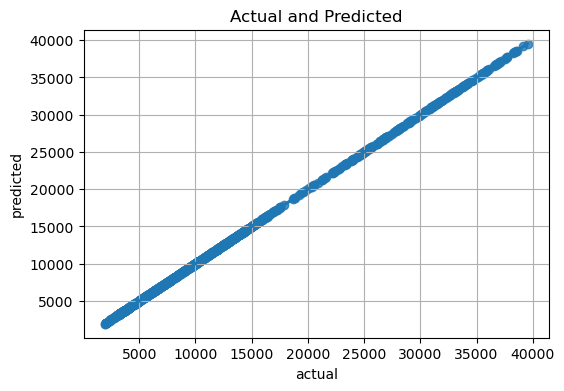

In [152]:
check_linearity(result,"actual","predicted")

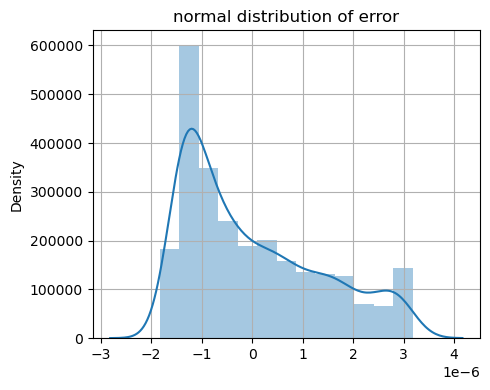

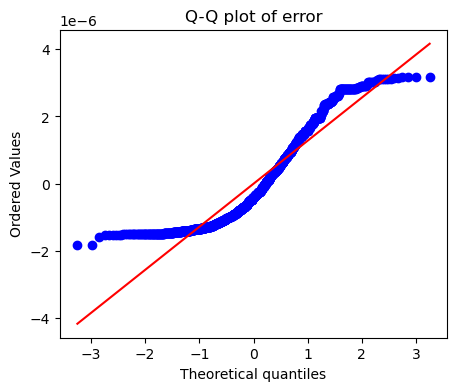

In [153]:
check_normallity_errors(residuals)

In [ ]:
def check_multicollinearity(X):

    print("Variance inflation factor (VIF)")
    vif_values = [vif(X,i) for i in range(len(X.columns))]

    vif_result=pd.DataFrame()
    vif_result["col_nanme"]=X.columns
    vif_result["VIF"]=vif_values
    return vif_result

In [158]:
x_poly.shape

(1204, 15)

In [161]:
check_multicollinearity(pd.DataFrame(x_poly,columns=[i for i in range(x_poly.shape[1])]))

Variance inflation factor (VIF)


,col_nanme,VIF
0,0,1.191018e+05
1,1,3.878185e+02
2,2,inf
3,3,3.864282e+02
4,4,1.335486e+03
5,5,7.155816e+00
6,6,2.188353e+00
7,7,4.437829e+00
8,8,3.852863e+02
9,9,inf


In [155]:
check_autocorrelation(residuals)

D-W test statistic : 1.9595756921805592
There is no autocorrelation


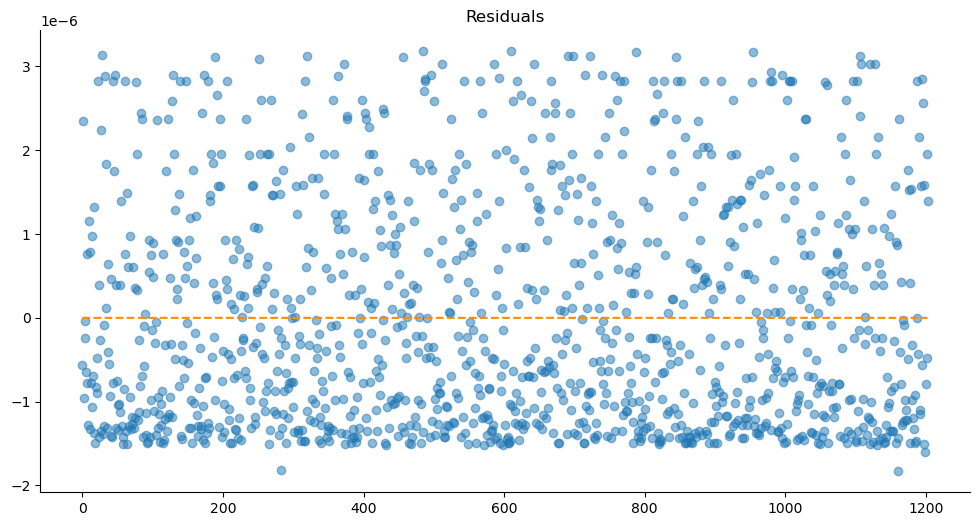

In [156]:
check_homoscedasticity(result,residuals)